# Lab 6. ỨNG DỤNG MẠNG NEURAL HỒI QUY 

MSSV: 20521196

Họ tên: Nguyễn Mạnh Đức

Lớp: DS201.N11.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd 

# 1. BÀI TOÁN PHÂN TÍCH CẢM XÚC (SENTIMENT ANALYSIS)

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/_UIT-VSFC/train/sents.txt',sep='\n', header=None, index_col=None)
y_train = pd.read_csv('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/_UIT-VSFC/train/sentiments.txt',sep='\n', header=None, index_col=None)
X_dev = pd.read_csv('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/_UIT-VSFC/dev/sents.txt',sep='\n', header=None, index_col=None)
y_dev = pd.read_csv('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/_UIT-VSFC/dev/sentiments.txt',sep='\n', header=None, index_col=None)
X_test = pd.read_csv('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/_UIT-VSFC/test/sents.txt',sep='\n', header=None, index_col=None)
y_test = pd.read_csv('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/_UIT-VSFC/test/sentiments.txt',sep='\n', header=None, index_col=None)
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

In [5]:
sl_2_train = sum(y_train[y_train == 2])/2
sl_1_train = sum(y_train[y_train == 1])
sl_0_train = len(y_train) - sl_2_train - sl_1_train 

sl_2_test = sum(y_test[y_test == 2])/2
sl_1_test = sum(y_test[y_test == 1])
sl_0_test = len(y_test) - sl_2_test - sl_1_test

sl_2_dev = sum(y_dev[y_dev == 2])/2
sl_1_dev = sum(y_dev[y_dev == 1])
sl_0_dev = len(y_dev) - sl_2_dev - sl_1_dev 

In [6]:
import matplotlib.pyplot as plt
labels = ['0', '1', '2'] 

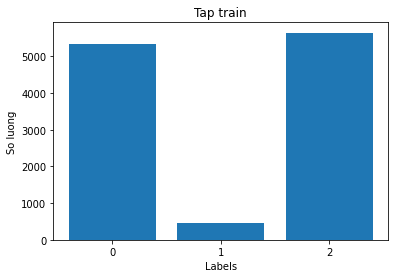

In [7]:
sl_train = [sl_0_train, sl_1_train, sl_2_train] 

plt.bar(labels, sl_train)
plt.ylabel('So luong')
plt.xlabel('Labels')
plt.title("Tap train")
plt.show()

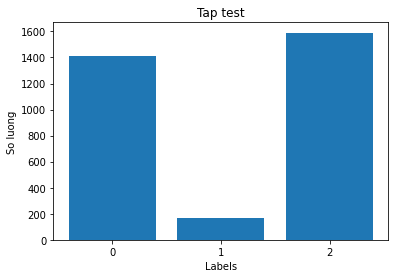

In [8]:
sl_test = [sl_0_test, sl_1_test, sl_2_test] 

plt.bar(labels, sl_test)
plt.ylabel('So luong')
plt.xlabel('Labels')
plt.title("Tap test")
plt.show()

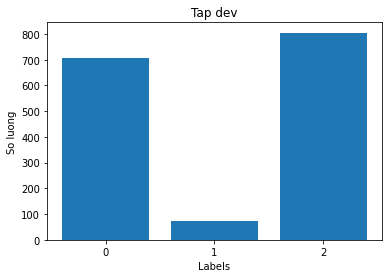

In [9]:
sl_dev = [sl_0_dev, sl_1_dev, sl_2_dev] 

plt.bar(labels, sl_dev)
plt.title("Tap dev")
plt.ylabel('So luong')
plt.xlabel('Labels')
plt.show()

In [10]:
EMBEDDING = '/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
  values = line.split(' ')
  word = values[0]
  word_dict.append(word)
  try:
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  except Exception as e:
    pass
f.close()
print('Embedding data loaded')

Embedding data loaded


In [11]:
words = word_dict
num_words = len(words)
num_words

1587508

In [12]:
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

# Dictionary label:index pair
idx2word = {i: w for w, i in word_to_index.items()}

In [13]:
idx2word

{2: '1587507',
 3: ',',
 4: '.',
 5: 'và',
 6: 'của',
 7: 'là',
 8: 'các',
 9: 'có',
 10: 'được',
 11: 'trong',
 12: 'cho',
 13: 'đã',
 14: 'với',
 15: 'một',
 16: 'không',
 17: 'người',
 18: ')',
 19: '(',
 20: 'những',
 21: '"',
 22: 'này',
 23: 'để',
 24: 'ở',
 25: 'khi',
 26: ':',
 27: 'về',
 28: 'năm',
 29: 'đến',
 30: '-',
 31: 'cũng',
 32: 'vào',
 33: 'trên',
 34: 'tại',
 35: 'nhiều',
 36: 'đó',
 37: 'sẽ',
 38: 'từ',
 39: 'ra',
 40: 'phải',
 41: 'như',
 42: 'ngày',
 43: 'lại',
 44: 'bị',
 45: 'ông',
 46: 'làm',
 47: 'hơn',
 48: 'việc',
 49: 'còn',
 50: 'nhưng',
 51: 'đang',
 52: 'sau',
 53: 'thì',
 54: 'biết',
 55: 'Việt_Nam',
 56: 'đi',
 57: 'nước',
 58: 'rất',
 59: 'mới',
 60: 'sự',
 61: 'có_thể',
 62: 'theo',
 63: 'mà',
 64: ';',
 65: 'nhất',
 66: 'chỉ',
 67: 'mình',
 68: 'nhà',
 69: 'tôi',
 70: 'trước',
 71: 'lên',
 72: 'vẫn',
 73: 'tới',
 74: 'con',
 75: 'nên',
 76: 'tháng',
 77: 'Theo',
 78: '2',
 79: 'đồng',
 80: 'cùng',
 81: 'hai',
 82: 'anh',
 83: 'khác',
 84: 'cao',
 8

In [14]:
embedding_matrix = np.zeros((num_words, embedding_dim))
# for each word in out tokenizer, try to find that work in our w2v model
for word, i in word_to_index.items():
  if i > max_feature:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:

    # add that words vector to the matrix
    embedding_matrix[i] = embedding_vector
  else:
    # doesn't exist, assign a random vector
    embedding_matrix[i] = np.random.randn(embedding_dim)

In [15]:
pip install vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 31.5 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645950 sha256=60a069e4d3caaca718b2174f266ea0784b79e7605ae0767458b233809f41c269
  Stored in directory: /root/.cache/pip/wheels/3c/e9/86/706911c12e307aeb9a2702399f0dad38d36f1d6f9dde8af35e
Successfully built vncorenlp


In [16]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/


--2022-12-19 13:23:51--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.09s   

2022-12-19 13:23:51 (282 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2022-12-19 13:23:51--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [17]:
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar",
annotators="wseg", max_heap_size='-Xmx500m')
def custom_tokenizer(text_data, tokenizer=True):
  if tokenizer:
    return " ".join(vncorenlp.tokenize(str(text_data))[0])
  return text_data

In [18]:
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
MAX_LEN = 100
NUM_LABEL = 3
TOKENIZER = True
def encoding(X, y):
  sentences = []
  for t in X:
    sentences.append(custom_tokenizer(t, tokenizer=TOKENIZER))
    X = []
  for s in sentences:
    sent = []
    for w in s.split():
      try:
        w = w.lower()
        sent.append(word_to_index[w])
      except:
        sent.append(word_to_index["UNK"])
    X.append(sent)
  X = pad_sequences(maxlen = MAX_LEN, sequences = X, padding = "post", value = word_to_index["PAD"])
  y = to_categorical(y, num_classes=NUM_LABEL)
  return (X,y)


In [19]:
X_train_encoded, y_train_encoded = encoding(X_train.values.flatten(), y_train)
X_dev_encoded, y_dev_encoded = encoding(X_dev.values.flatten(), y_dev)
X_test_encoded, y_test_encoded = encoding(X_test.values.flatten(), y_test)

In [27]:
from keras.layers import * 
from keras.models import *
from keras.initializers import Constant

model = Sequential()
model.add(Input(shape=(MAX_LEN, ), dtype="float64"))
model.add(Embedding(input_dim=num_words,
output_dim=embedding_dim,
embeddings_initializer=Constant(embedding_matrix),
input_length=MAX_LEN, trainable=False))
model.add(Bidirectional(LSTM(200, return_sequences=False)))
model.add(Dense(3, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          158750800 
                                                                 
 bidirectional_1 (Bidirectio  (None, 400)              481600    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 159,233,603
Trainable params: 482,803
Non-trainable params: 158,750,800
_________________________________________________________________


In [29]:
from keras.optimizers import *
from keras.losses import *

optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [31]:
history = model.fit(
    X_train_encoded,
    y_train_encoded,
    validation_data = (X_dev_encoded,y_dev_encoded),
    epochs = 10,
    batch_size = 128
)

Epoch 1/10
90/90 [==============================] - 7s 34ms/step - loss: 0.5522 - accuracy: 0.7683 - val_loss: 0.4372 - val_accuracy: 0.8187
Epoch 2/10
90/90 [==============================] - 2s 24ms/step - loss: 0.3773 - accuracy: 0.8636 - val_loss: 0.3810 - val_accuracy: 0.8711
Epoch 3/10
90/90 [==============================] - 2s 24ms/step - loss: 0.3134 - accuracy: 0.8903 - val_loss: 0.3205 - val_accuracy: 0.8882
Epoch 4/10
90/90 [==============================] - 2s 24ms/step - loss: 0.2822 - accuracy: 0.8986 - val_loss: 0.2848 - val_accuracy: 0.8977
Epoch 5/10
90/90 [==============================] - 3s 29ms/step - loss: 0.2542 - accuracy: 0.9120 - val_loss: 0.2783 - val_accuracy: 0.9059
Epoch 6/10
90/90 [==============================] - 2s 25ms/step - loss: 0.2286 - accuracy: 0.9207 - val_loss: 0.2669 - val_accuracy: 0.9097
Epoch 7/10
90/90 [==============================] - 3s 32ms/step - loss: 0.2089 - accuracy: 0.9266 - val_loss: 0.2700 - val_accuracy: 0.9040
Epoch 8/10
90

In [32]:
def modelPlot(history,is_accuracy,is_loss):
    plt.figure(figsize = (20,7))
    if is_accuracy:
        plt.subplot(121)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.xlabel("epochs")
        plt.title("model_accuracy")
        plt.legend(['train','val'],loc = 'upper right')
    if is_loss:
        plt.subplot(122)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.xlabel("epochs")
        plt.title("model_loss")
        plt.legend(['train','val'],loc = 'upper right')



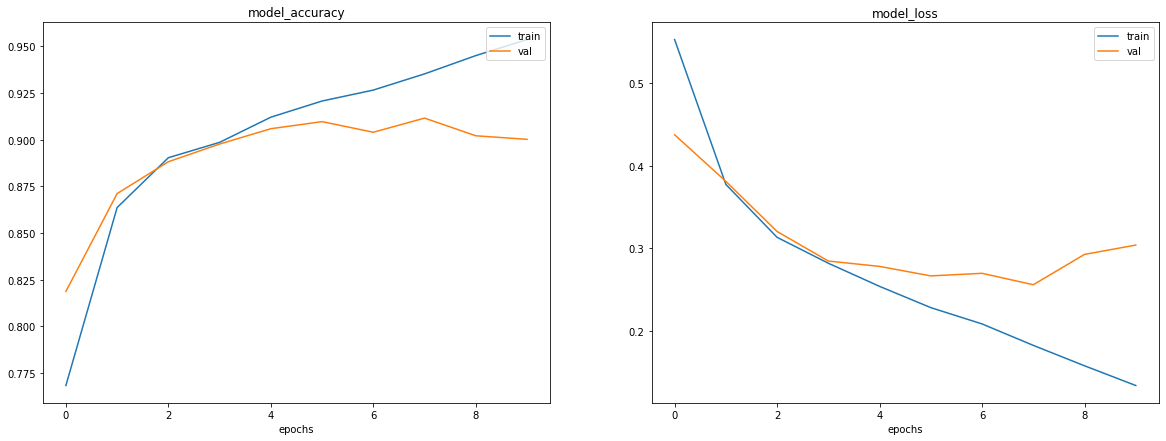

In [33]:
modelPlot(history,1,1)

# 2. BÀI TOÁN NHẬN DIỆN THỰC THỂ CÓ TÊN (NAMEDENTITIES RECOGNITION)

In [59]:
train = "/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/PhoNER_COVID19-main/data/word/train_word.conll"
dev = "/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/PhoNER_COVID19-main/data/word/dev_word.conll"
test = "/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/PhoNER_COVID19-main/data/word/test_word.conll"

In [60]:
def load_data_and_labels(filename, encoding='utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding=encoding) as f:
    for line in f:
      try:
        line = line.strip()
        if line:
          word, tag = line.split(" ")
          words.append(word)
          tags.append(tag)
        else:
          sents.append(words)
          labels.append(tags)
          words, tags = [], []
      except Exception as e:
        pass
  return sents, labels
  
train_set = load_data_and_labels(train)
dev_set = load_data_and_labels(dev)
test_set = load_data_and_labels(test)

In [62]:
tags = list(set(np.concatenate((np.concatenate(train_set[1]),
np.concatenate(dev_set[1])))))
tags2idx = {t:i for i,t in enumerate(tags)}

(array([2.060e+03, 2.095e+03, 6.810e+02, 1.480e+02, 3.100e+01, 8.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  6. ,  21.5,  37. ,  52.5,  68. ,  83.5,  99. , 114.5, 130. ,
        145.5, 161. ]),
 <a list of 10 Patch objects>)

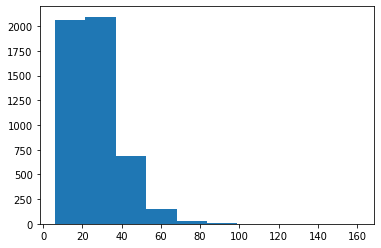

In [64]:
plt.hist(np.vectorize(len) (train_set[0]))

In [67]:
num_words = len(words)

word2idx = {w:i+2 for i,w in enumerate(words)}
word2idx["PAD"] = 1
word2idx["UNK"] = 0

In [68]:
MAX_LEN_NER = 60
def encoding_ner(X,y):
  sentences = []
  for sent in X:
    te = []
    for w in sent:
      try:
        te.append(word2idx[w])
      except:
        te.append(word2idx['UNK'])
    sentences.append(te)
  sentences = pad_sequences(sentences,padding='post',value = word2idx['UNK'],maxlen = MAX_LEN_NER)

  y = [[tags2idx[tag] for tag in tags]for tags in y] 
  y = pad_sequences(y,padding='post',value = tags2idx['O'],maxlen = MAX_LEN_NER)

  y = to_categorical(y,num_classes = len(tags2idx))
  return sentences,y

In [69]:
X_train_encoded_ner,y_train_new_ner = encoding_ner(train_set[0],train_set[1])
X_dev_encoded_ner,y_dev_new_ner = encoding_ner(dev_set[0],dev_set[1])
X_test_encoded_ner, y_test_new_ner = encoding_ner(test_set[0],test_set[1])

In [70]:
input = Input(shape = (MAX_LEN_NER))
embedding = Embedding(input_dim = num_words,output_dim = embedding_dim,input_length =MAX_LEN_NER,embeddings_initializer=Constant(embedding_matrix),trainable = False) (input)
bi_lstm = Bidirectional(LSTM(units=512, return_sequences=True,
                        recurrent_dropout=0.2, dropout=0.2)) (embedding)
output = TimeDistributed(Dense(len(tags2idx),activation ='softmax')) (bi_lstm)

In [71]:
model_ner = Model(input, output)
model_ner.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 60, 100)           158750800 
                                                                 
 bidirectional_6 (Bidirectio  (None, 60, 1024)         2510848   
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 60, 20)           20500     
 ibuted)                                                         
                                                                 
Total params: 161,282,148
Trainable params: 2,531,348
Non-trainable params: 158,750,800
_________________________________________________________________


In [72]:
model_ner.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [73]:
history_ner = model_ner.fit(
    X_train_encoded_ner,
    y_train_new_ner,
    validation_data = (X_dev_encoded_ner,y_dev_new_ner),
    epochs = 3,
    batch_size = 128
)

Epoch 1/3
40/40 [==============================] - 35s 746ms/step - loss: 1.5111 - accuracy: 0.8869 - val_loss: 1.8678 - val_accuracy: 0.8841
Epoch 2/3
40/40 [==============================] - 20s 511ms/step - loss: 1.4711 - accuracy: 0.9087 - val_loss: 1.8678 - val_accuracy: 0.8841
Epoch 3/3
40/40 [==============================] - 23s 567ms/step - loss: 1.4711 - accuracy: 0.9087 - val_loss: 1.8678 - val_accuracy: 0.8841


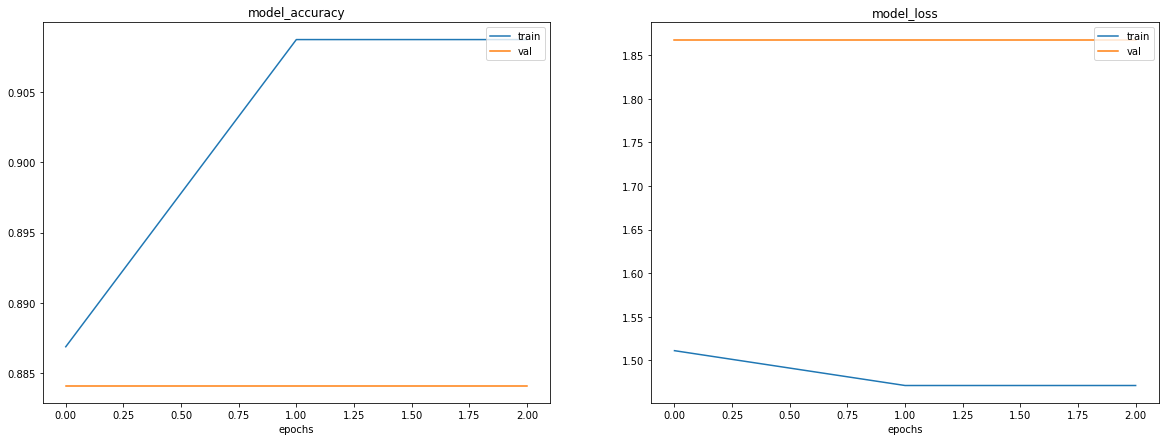

In [74]:
modelPlot(history_ner,1,1)

In [75]:
y_pred = np.argmax(model_ner.predict(X_test_encoded_ner),axis=-1)

94/94 [==============================] - 4s 41ms/step


In [76]:
import numpy as np
from sklearn.metrics import accuracy_score
acc = []
for i in range(0, len(y_test_new_ner)):
  acc.append(accuracy_score(np.argmax(y_test_new_ner,axis=-1)[i], y_pred[i]))

np.mean(acc)*100

87.89722222222224

In [77]:
np.argmax(model_ner.predict(X_test_encoded_ner),axis = 2)[2]

94/94 [==============================] - 4s 41ms/step


array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

# BÀI TẬP

## Bai 01

In [36]:
model_bt1 = Sequential()
model_bt1.add(Input(shape=(MAX_LEN, ), dtype="float64"))
model_bt1.add(Embedding(input_dim=num_words,
output_dim=embedding_dim,
embeddings_initializer=Constant(embedding_matrix),
input_length=MAX_LEN, trainable=False))
model_bt1.add(Bidirectional(LSTM(200, return_sequences=False)))
model_bt1.add(Dense(3, activation='softmax'))

In [37]:
model_bt1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          158750800 
                                                                 
 bidirectional_2 (Bidirectio  (None, 400)              481600    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 159,233,603
Trainable params: 482,803
Non-trainable params: 158,750,800
_________________________________________________________________


In [38]:
model_bt1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [40]:
history_bt1 = model_bt1.fit(
    X_train_encoded,
    y_train_encoded,
    validation_data = (X_dev_encoded,y_dev_encoded),
    epochs = 10,
    batch_size = 128
)

Epoch 1/10
90/90 [==============================] - 8s 39ms/step - loss: 0.9587 - accuracy: 0.6028 - val_loss: 0.6405 - val_accuracy: 0.7239
Epoch 2/10
90/90 [==============================] - 2s 25ms/step - loss: 0.6121 - accuracy: 0.7432 - val_loss: 0.5230 - val_accuracy: 0.8092
Epoch 3/10
90/90 [==============================] - 2s 25ms/step - loss: 0.5202 - accuracy: 0.7949 - val_loss: 0.4656 - val_accuracy: 0.8282
Epoch 4/10
90/90 [==============================] - 3s 30ms/step - loss: 0.4525 - accuracy: 0.8297 - val_loss: 0.4344 - val_accuracy: 0.8383
Epoch 5/10
90/90 [==============================] - 3s 32ms/step - loss: 0.4254 - accuracy: 0.8423 - val_loss: 0.4964 - val_accuracy: 0.8124
Epoch 6/10
90/90 [==============================] - 2s 26ms/step - loss: 0.4218 - accuracy: 0.8446 - val_loss: 0.4413 - val_accuracy: 0.8282
Epoch 7/10
90/90 [==============================] - 2s 25ms/step - loss: 0.4155 - accuracy: 0.8471 - val_loss: 0.4112 - val_accuracy: 0.8471
Epoch 8/10
90

In [41]:
y_pred_bt1 = np.argmax(model_bt1.predict(X_test_encoded),axis = 1)

99/99 [==============================] - 1s 6ms/step


In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

print("Precision:",precision_score(y_test,y_pred_bt1,average = 'macro'))
print("Recall:",recall_score(y_test,y_pred_bt1,average = 'macro'))
print("F1-score:",f1_score(y_test,y_pred_bt1,average = 'macro'))

Precision: 0.5396599518253872
Recall: 0.5396821570824276
F1-score: 0.5263400374924538


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(confusion_matrix(y_test,y_pred_bt1))

[[ 913    0  496]
 [  53    0  114]
 [  46    0 1544]]


## Bai 02

In [44]:
model_bt2 = Sequential()
model_bt2.add(Input(shape=(MAX_LEN, ), dtype="float64"))
model_bt2.add(Embedding(input_dim=num_words,
output_dim=embedding_dim,
embeddings_initializer=Constant(embedding_matrix),
input_length=MAX_LEN, trainable=False))
model_bt2.add(Bidirectional(LSTM(200, return_sequences=True)))
model_bt2.add(Bidirectional(LSTM(200, return_sequences=False)))
model_bt2.add(Dense(3, activation='softmax'))

In [45]:
model_bt2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          158750800 
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 400)         481600    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 400)              961600    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 160,195,203
Trainable params: 1,444,403
Non-trainable params: 158,750,800
_________________________________________________________________


In [46]:
model_bt2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [47]:
history_bt2 = model_bt2.fit(
    X_train_encoded,
    y_train_encoded,
    validation_data = (X_dev_encoded,y_dev_encoded),
    epochs = 10,
    batch_size = 128
)

Epoch 1/10
90/90 [==============================] - 15s 77ms/step - loss: 1.0146 - accuracy: 0.5298 - val_loss: 0.7687 - val_accuracy: 0.6677
Epoch 2/10
90/90 [==============================] - 6s 62ms/step - loss: 0.7383 - accuracy: 0.6989 - val_loss: 0.7544 - val_accuracy: 0.6999
Epoch 3/10
90/90 [==============================] - 6s 63ms/step - loss: 0.7274 - accuracy: 0.7025 - val_loss: 0.7957 - val_accuracy: 0.7069
Epoch 4/10
90/90 [==============================] - 6s 68ms/step - loss: 0.7063 - accuracy: 0.7098 - val_loss: 0.6952 - val_accuracy: 0.7246
Epoch 5/10
90/90 [==============================] - 6s 65ms/step - loss: 0.6983 - accuracy: 0.7132 - val_loss: 0.7037 - val_accuracy: 0.7233
Epoch 6/10
90/90 [==============================] - 6s 63ms/step - loss: 0.6819 - accuracy: 0.7240 - val_loss: 0.7159 - val_accuracy: 0.7246
Epoch 7/10
90/90 [==============================] - 6s 63ms/step - loss: 0.7058 - accuracy: 0.7099 - val_loss: 0.7866 - val_accuracy: 0.7006
Epoch 8/10
9

In [51]:
y_pred_bt2 = np.argmax(model_bt2.predict(X_test_encoded),axis = 1)

99/99 [==============================] - 2s 12ms/step


In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

print("Precision:",precision_score(y_test,y_pred_bt2,average = 'macro'))
print("Recall:",recall_score(y_test,y_pred_bt2,average = 'macro'))
print("F1-score:",f1_score(y_test,y_pred_bt2,average = 'macro'))

Precision: 0.47786470973505485
Recall: 0.5015021730623589
F1-score: 0.4881457060969517


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.47786470973505485
Recall: 0.5015021730623589
F1-score: 0.4881457060969517


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print(confusion_matrix(y_test,y_pred_bt2))

[[ 951    0  458]
 [ 107    0   60]
 [ 271    0 1319]]


## Bai 03

In [80]:
input = Input(shape = (MAX_LEN_NER))
embedding = Embedding(input_dim = num_words,output_dim = embedding_dim,input_length =MAX_LEN_NER,embeddings_initializer=Constant(embedding_matrix),trainable = False) (input)
bi_lstm = Bidirectional(LSTM(units=512, return_sequences=True,
                        recurrent_dropout=0.2, dropout=0.2)) (embedding)
output = TimeDistributed(Dense(len(tags2idx),activation ='softmax')) (bi_lstm)

In [81]:
model_bt3 = Model(input, output)
model_bt3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 60, 100)           158750800 
                                                                 
 bidirectional_8 (Bidirectio  (None, 60, 1024)         2510848   
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 60, 20)           20500     
 tributed)                                                       
                                                                 
Total params: 161,282,148
Trainable params: 2,531,348
Non-trainable params: 158,750,800
_________________________________________________________________


In [82]:
model_bt3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [83]:
history_bt3 = model_bt3.fit(
    X_train_encoded_ner,
    y_train_new_ner,
    validation_data = (X_dev_encoded_ner,y_dev_new_ner),
    epochs = 3,
    batch_size = 128
)

Epoch 1/3
40/40 [==============================] - 37s 838ms/step - loss: 1.5114 - accuracy: 0.8857 - val_loss: 1.8678 - val_accuracy: 0.8841
Epoch 2/3
40/40 [==============================] - 20s 504ms/step - loss: 1.4711 - accuracy: 0.9087 - val_loss: 1.8678 - val_accuracy: 0.8841
Epoch 3/3
40/40 [==============================] - 20s 497ms/step - loss: 1.4711 - accuracy: 0.9087 - val_loss: 1.8678 - val_accuracy: 0.8841


In [84]:
y_pred_bt3 = np.argmax(model_bt3.predict(X_test_encoded_ner),axis=-1)

94/94 [==============================] - 4s 41ms/step


In [85]:
from sklearn.metrics import accuracy_score
acc = []
for i in range(0, len(y_test_new_ner)):
  acc.append(accuracy_score(np.argmax(y_test_new_ner,axis=-1)[i], y_pred_bt3[i]))

np.mean(acc)*100

87.89722222222224

In [86]:
np.argmax(model_bt3.predict(X_test_encoded_ner),axis = 2)[2]

94/94 [==============================] - 4s 40ms/step


array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

## Bai 04

In [89]:
train = "/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/PhoNER_COVID19-main/data/syllable/train_syllable.conll"
dev = "/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/PhoNER_COVID19-main/data/syllable/dev_syllable.conll"
test = "/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/PhoNER_COVID19-main/data/syllable/test_syllable.conll"

train_set_syllable = load_data_and_labels(train)
dev_set_syllable = load_data_and_labels(dev)
test_set_syllable = load_data_and_labels(test)

## Bai 05

In [90]:
input = Input(shape = (MAX_LEN_NER))
embedding = Embedding(input_dim = num_words,output_dim = embedding_dim,input_length =MAX_LEN_NER,embeddings_initializer=Constant(embedding_matrix),trainable = False) (input)
bi_lstm = Bidirectional(LSTM(units=512, return_sequences=True,
                        recurrent_dropout=0.2, dropout=0.2)) (embedding)
bi_lstm = Bidirectional(LSTM(units=512, return_sequences=True,
                        recurrent_dropout=0.2, dropout=0.2)) (bi_lstm)                        
output = TimeDistributed(Dense(len(tags2idx),activation ='softmax')) (bi_lstm)

In [91]:
model_bt5 = Model(input, output)
model_bt5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_8 (Embedding)     (None, 60, 100)           158750800 
                                                                 
 bidirectional_9 (Bidirectio  (None, 60, 1024)         2510848   
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 60, 1024)         6295552   
 onal)                                                           
                                                                 
 time_distributed_3 (TimeDis  (None, 60, 20)           20500     
 tributed)                                                       
                                                           

In [92]:
model_bt5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [93]:
history_bt5 = model_bt5.fit(
    X_train_encoded_ner,
    y_train_new_ner,
    validation_data = (X_dev_encoded_ner,y_dev_new_ner),
    epochs = 3,
    batch_size = 128
)

Epoch 1/3
40/40 [==============================] - 58s 1s/step - loss: 1.5102 - accuracy: 0.8868 - val_loss: 1.8678 - val_accuracy: 0.8841
Epoch 2/3
40/40 [==============================] - 41s 1s/step - loss: 1.4711 - accuracy: 0.9087 - val_loss: 1.8678 - val_accuracy: 0.8841
Epoch 3/3
40/40 [==============================] - 43s 1s/step - loss: 1.4711 - accuracy: 0.9087 - val_loss: 1.8678 - val_accuracy: 0.8841


In [94]:
y_pred_bt5 = np.argmax(model_bt5.predict(X_test_encoded_ner),axis=-1)

94/94 [==============================] - 9s 86ms/step


In [95]:
import numpy as np
from sklearn.metrics import accuracy_score
acc = []
for i in range(0, len(y_test_new_ner)):
  acc.append(accuracy_score(np.argmax(y_test_new_ner,axis=-1)[i], y_pred_bt5[i]))

np.mean(acc)*100

87.89722222222224